In [81]:
import requests

file="/workspace/lightning-hydra-timm-template/tests/cifar10_test_images/10035_automobile.png"

res = requests.post("http://localhost:8080/predictions/cifar10/1.0", files={'data': open(file, 'rb')})

res.json()

{'automobile': 0.6364913582801819,
 'airplane': 0.2888428270816803,
 'truck': 0.07137328386306763,
 'cat': 0.0007711867801845074,
 'ship': 0.0007093707099556923}

In [73]:
list(reeq.keys())[0]

'code'

In [26]:
s = "1002_cat.png"

In [27]:
os.path.splitext(s)[0].split('_')[1] == list(reeq.keys())[0]

True

In [13]:
from .serve.ts_scripts.torchserve_grpc_client import infer

ImportError: attempted relative import with no known parent package

In [10]:
from .src.train import train

ImportError: attempted relative import with no known parent package

In [16]:
cmd = "python /workspace/lightning-hydra-timm-template/serve/ts_scripts/torchserve_grpc_client.py infer cifar10 /workspace/lightning-hydra-timm-template/tests/cifar10_test_images/1002_cat.png"
r = os.system(cmd)

{
  "cat": 0.8451986312866211,
  "dog": 0.14413239061832428,
  "frog": 0.007081182673573494,
  "truck": 0.0017471583560109138,
  "horse": 0.0007704101735725999
}


In [18]:
import subprocess
output = subprocess.check_output(cmd, shell=True)
output

b'{\n  "cat": 0.8451986312866211,\n  "dog": 0.14413239061832428,\n  "frog": 0.007081182673573494,\n  "truck": 0.0017471583560109138,\n  "horse": 0.0007704101735725999\n}\n'

In [21]:
t = eval(output)
t

{'cat': 0.8451986312866211,
 'dog': 0.14413239061832428,
 'frog': 0.007081182673573494,
 'truck': 0.0017471583560109138,
 'horse': 0.0007704101735725999}

In [28]:
import torch
import numpy as np
import torchvision.transforms as T

from PIL import Image

from captum.attr import visualization as viz

/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['10010_airplane.png',
 '1002_cat.png',
 '10035_automobile.png',
 '10072_dog.png',
 '10075_truck.png',
 '10081_horse.png',
 '10142_ship.png',
 '10174_deer.png',
 '10292_automobile.png']

In [68]:
def run(im,file):
	res = requests.post("http://localhost:8080/explanations/cifar10/1.0", files={'data': open(file, 'rb')})

	ig = res.json()
	img_path = file
	ig = res.json()

	inp_image = Image.open(img_path)
	to_tensor = T.Compose([
		T.Resize((32, 32)),
		T.ToTensor()
	])
	inp_image = to_tensor(inp_image)

	inp_image = inp_image.numpy()
	attributions = np.array(ig)

	inp_image, attributions = inp_image.transpose(1, 2, 0), attributions.transpose(1, 2, 0)
	# plt.imshow(inp_image, cmap="inferno")
	
	# viz.visualize_image_attr(attributions, inp_image, method="blended_heat_map",sign="all", show_colorbar=True, title=im)

	fg,_ = viz.visualize_image_attr_multiple(attributions, inp_image, methods=["original_image","blended_heat_map"],signs=["all","all"], show_colorbar=True, titles=[im,'IG'],fig_size=(4,3) )
	fg.savefig(im)
	plt.show()

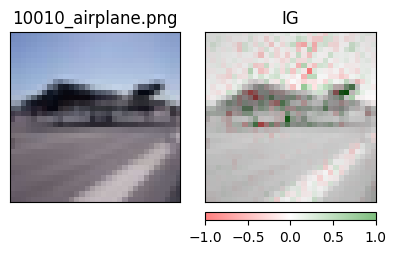

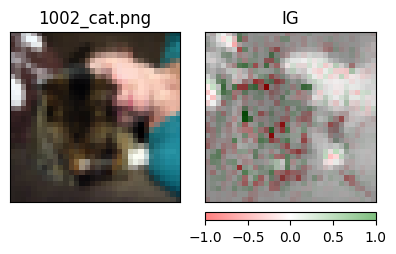

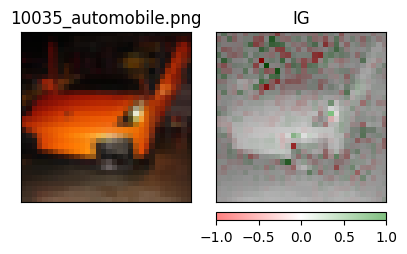

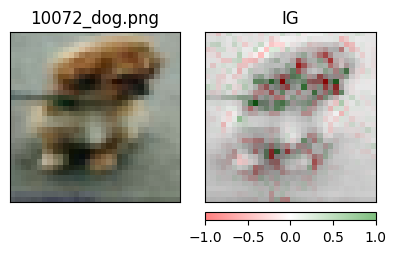

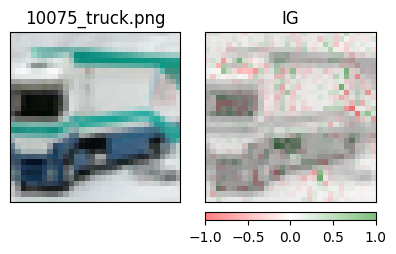

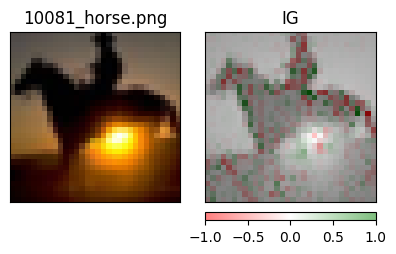

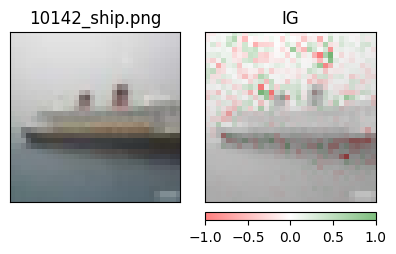

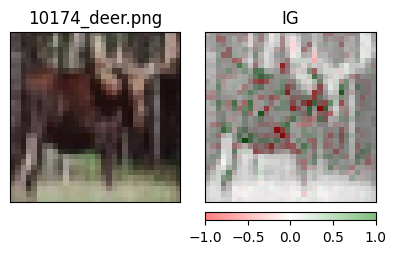

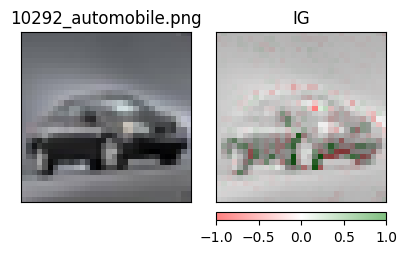

In [69]:
for im in os.listdir("/workspace/lightning-hydra-timm-template/tests/cifar10_test_images/"):
    run(im,f'/workspace/lightning-hydra-timm-template/tests/cifar10_test_images/{im}')

In [39]:
inp_image.shape, attributions.shape

((32, 32, 3), (32, 32, 3))

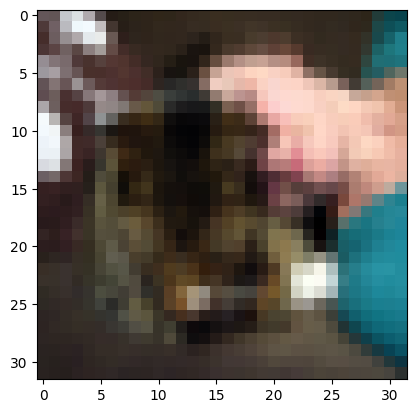

In [40]:
import matplotlib.pyplot as plt

plt.imshow(inp_image, cmap="inferno")